In [5]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

# <center>Day27 - Nonparametric Regression</center>

Today we'll be using this (real!) data set.



Boston House Prices dataset
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000 dollars
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing


---

Begin by importing the `pandas` library

In [23]:
import pandas as pd

Let's see some of the commands we'll use today. Begin by the `read_csv` command, used to load files in `comma_separated_values`.

In [24]:
data = pd.read_csv("boston.csv")

In [33]:
data.tail(3)

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,11.9,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


If you want a portion of the data set, specify what chunk you want with the suffix `.ix` (for "index"). Usage is:

`
data.ix[row_begin:(row_end+1), list_of_column_names]
`

In [37]:
data.ix[3:7, ["PRICE", "NOX", "CHAS"]]

,PRICE,NOX,CHAS
3,33.4,0.458,0.0
4,36.2,0.458,0.0
5,28.7,0.458,0.0
6,22.9,0.524,0.0
7,27.1,0.524,0.0


If you want *all* rows or *all columns*, leave a colon `:`

In [42]:
#data.ix[:, ["PRICE", "NOX"]] # All rows
data.ix[3:7, :] # All columns

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,28.7,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,22.9,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,27.1,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15


Remember that in `numpy`, we can do this sort of `boolean indexing`?

In [43]:
A = np.array([1,2,3,4,5])
idx = A > 3       # Boolean index: np.array([False, False, False, True, True]
A[idx]            # Picks out elems of A for which corresponding elem of idx was True

array([4, 5])

It turns out we can do the same with `pandas` `DataFrame`!

In [44]:
idx = data.ix[:, "CHAS"] == 1  # Creates a boolean pandas Series of same length
data.ix[idx, :]                # Selects only rows for whose row in the Series above is True

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
142,13.4,3.32105,0.0,19.58,1.0,0.8710,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82
152,15.3,1.12658,0.0,19.58,1.0,0.8710,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12
154,17.0,1.41385,0.0,19.58,1.0,0.8710,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12
155,15.6,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
160,27.0,1.27346,0.0,19.58,1.0,0.6050,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
162,50.0,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92
163,50.0,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32
208,24.4,0.13587,0.0,10.59,1.0,0.4890,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66
209,20.0,0.43571,0.0,10.59,1.0,0.4890,5.344,100.0,3.8750,4.0,277.0,18.6,396.90,23.09
210,21.7,0.17446,0.0,10.59,1.0,0.4890,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27


Now let's go back to Statistics.

---

# <center> $E[Y|X]$ when $X$ is discrete

Let's estimate the average `PRICE` of houses in Boston when they are close to Charles River (`CHAS = 1`), and when they are not (`CHAS = 0`). To do so, we will compute:

$$\hat{g}(1) = \hat{E}[\ PRICE\ | \ CHAS = 1 \ ] = \frac{\text{Price of houses with CHAS = 1}}{\text{Number of houses with CHAS = 1}}$$

First, let's create a smaller DataFrame containing only the observations with CHAS = 1 by boolean indexing, as above.

In [17]:
idx = data.ix[:, "CHAS"] == 1  # Repeating down here for convenient
price_chas1 = data.ix[idx, ["PRICE"]] # Selecting only rows with CHAS = 1, and only PRICE column
price_chas1.head(6)   # Prints out the first 6 rows

,PRICE
142,13.4
152,15.3
154,17.0
155,15.6
160,27.0
162,50.0


Now wejust take the `mean` of this object. Just pretend it is a `numpy` array.

In [45]:
EPRICE_CHAS1 = np.mean(price_chas1)

In [46]:
EPRICE_CHAS1

PRICE    28.44
dtype: float64

Now you do it for the case CHAS = 0! Save your results in a variable called `EPRICE_CHAS0`.

In [47]:
EPRICE_CHAS0 = 22.09

Before uncommenting the line below: what do you expect the results to be? Why?

In [48]:
print("Estimate of E[PRICE|CHAS = 1] = ", EPRICE_CHAS1)
print("Estimate of E[PRICE|CHAS = 0] = ", EPRICE_CHAS0)

Estimate of E[PRICE|CHAS = 1] =  PRICE    28.44
dtype: float64
Estimate of E[PRICE|CHAS = 0] =  22.09


<b>Discussion</b>

1) What kind of conclusion can we draw from the numbers above?

2) A *causal effect* takes place when we consider *manipulations*. 

<u><b><i>If</b><i></u> `CHAS` affects `PRICE`, then we can say something like:

+ Take a house at random from somewhere else in Boston
+ Put it near the Charles River
+ The <i>average causal effect</i> will be $E[PRICE|CHAS = 1] - E[PRICE|CHAS = 0]$
    
The above reasoning may be invalid here. Why?


3) [Hard] What could you do to find the *causal* effect of `CHAS` on `PRICE`?

---

# <center> $E[Y|X]$ when $X$ is continuous

Now let's find out the effect of `NOX` on `PRICE`.

**Extra** `pandas` has convenient <a href="http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html">visualization tools</b>.

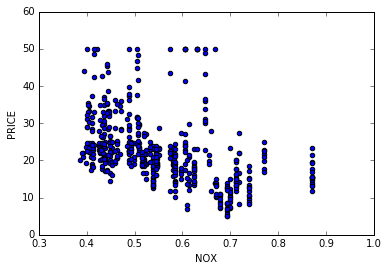

In [49]:
data.plot(kind = "scatter", x = "NOX", y = "PRICE")

Just by looking at the scatterplot above, what do you think would be the value of, for example,

$$E[Y|X = 0.8] - E[Y|X = 0.5]$$

Let's estimate that effect by computing estimates of

$$E[\ PRICE \ | \ 0.7 < NOX \leq 0.9 \ ] - E[\ PRICE \ | \ 0.4 < NOX \leq 0.6]$$

I'll do the left term. You do the right one.

In [50]:
idx8 = (.7 < data.ix[:,"NOX"]) & (data.ix[:,"NOX"] <= 0.9)  # & means 'and'
EPRICE_NOX8 = data.ix[idx8, "PRICE"].mean()

In [51]:
EPRICE_NOX8

16.140983606557377

In [52]:
# Do the right term! Store the result in a variable called EPRICE_NOX5
EPRICE_NOX5 = 24.43

Now print the difference between the two.

In [53]:
EPRICE_NOX8 - EPRICE_NOX5

-8.289016393442623

<b>Discussion</b>

How about here? Is there a causal relationship? Why or why not?

----



# <center> \*\*\*\*\*\* END OF CLASS SCOPE \*\*\*\*\*\*\*\*

<center> I jotted down a few notes and comments for the nerdiest amongst you. It's not testable material.

</center>

----

**Comment on `pandas`**

If you're interested in working with data in any capacity, I highly recommend you take some time to study the `pandas` library. 

For example, you can make and plot summaries of your data in one line. Like this one.

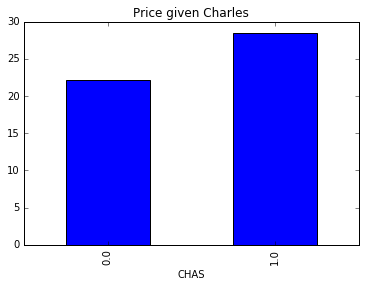

In [54]:
data.groupby("CHAS").mean()["PRICE"].plot(kind = "bar", title = "Price given Charles")

In my opinion, nothing is easier than `pandas` when it comes to cleaning and merging different data sets. When time comes that you're faced with such a task, please try out any of the pandas <a href="http://pandas.pydata.org/pandas-docs/stable/10min.html">tutorials</a> online. I promise it'll be worth the few hours it takes to get things working.

---

**Comment on Non-parametric Regression**

Today we did two examples of regression, and both were *nonparametric* (if the distinction isn't clear yet, don't worry: it'll be by next week). There are actually a great many ways of doing nonparametric regression. In fact, I'd say like 80% of what machine learning experts are doing is nonparametric regression in some form. 

If you're interested in doing something sexy in this field, go check out the <a href="http://scikit-learn.org/stable/">scikit-learn</a> library immediately, and try out a few regression algorithms. The usage is pretty simple.

Let's use some other variable, for variety.

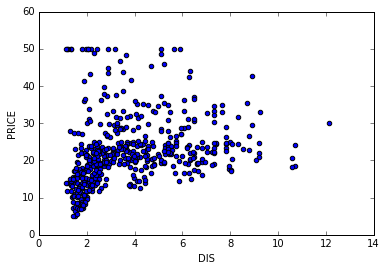

In [57]:
data.plot(kind = "scatter", x = "DIS", y = "PRICE")

Let me just make sure that the data we have is in acceptable for scikit-learn.

In [58]:
# Just making sure the data is in acceptable form for sklearn
X = data.ix[:, "DIS"].values.reshape(-1, 1)
Y = data.ix[:,"PRICE"].values.reshape(-1, 1)

# This is a grid of points we'll predict E[Y|X=x] over
X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # We'll guess the value of Y for points on this grid

### Linear regression

Starting with the most basic algorithm there is.

In [60]:
import sklearn.linear_model as skl
ols = skl.LinearRegression()
ols.fit(X, Y)
EY = ols.predict(X_grid)

Done! We've imported and instantiated a LinearRegression in the first two lines, fit a linear regression in the third line, and then predicted over X_grid in the fourth. 

The result is plotted below.

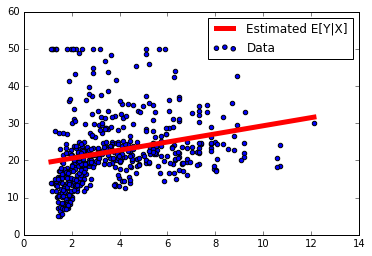

In [61]:
fig, ax = plt.subplots(1)
ax.scatter(X, Y, label = "Data")
ax.plot(X_grid, EY, linewidth = 5, label = "Estimated E[Y|X]", color = "red")
ax.legend()

The linear fit is not fantastic. Want to try something different? Why not a **support vector regression**? (Whatever that is?)

In [64]:
import sklearn.svm as svm
svr = svm.SVR(kernel = "rbf")
svr.fit(X, Y.ravel())
EY = svr.predict(X_grid)

Did you note how similar the syntax was?

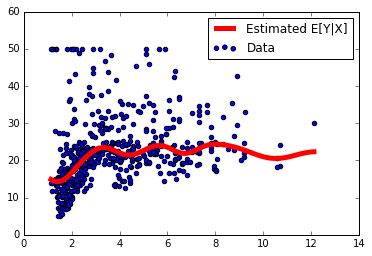

In [65]:
fig, ax = plt.subplots(1)
ax.scatter(X, Y, label = "Data")
ax.plot(X_grid, EY, linewidth = 5, label = "Estimated E[Y|X]", color = "red")
ax.legend()

Another super common algorithm is **K-nearest neighbor regression**. It estimates $E[Y|X = x]$ by taking the average of the $K$ data points nearest to the query point $x$.

In [72]:
import sklearn.neighbors as skn
knn = skn.KNeighborsRegressor(n_neighbors = 20)
knn.fit(X, Y.ravel())
EY = knn.predict(X_grid)

Try changing the number of neighbors above, and check out how the plot below changes. 

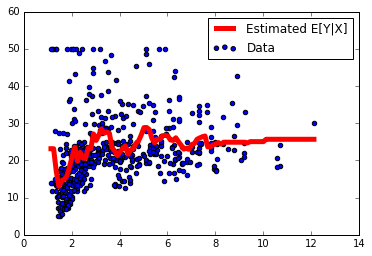

In [73]:
fig, ax = plt.subplots(1)
ax.scatter(X, Y, label = "Data")
ax.plot(X_grid, EY, linewidth = 5, label = "Estimated E[Y|X]", color = "red")
ax.legend()

Have fun, and ask me for me if you're interested!